In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [66]:
df_2011 = pd.read_excel('online_retail.xlsx', sheet_name = 1)

In [67]:
df_2011.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [68]:
df_2011.describe()

,Quantity,Price,Customer ID
count,541910.00,541910.00,406830.00
mean,9.55,4.61,15287.68
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [69]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [70]:
df_2011[df_2011['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [71]:
df_2011['Customer ID'].nunique()

4372

In [72]:
df_2011[df_2011['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [73]:
df_2011["Invoice"] = df_2011["Invoice"].astype(str)
df_2011[df_2011["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [74]:
df_2011["Invoice"].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [75]:
df_2011[df_2011["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [76]:
df_2011['StockCode'].nunique()

4070

In [77]:
df_2011["StockCode"] = df_2011["StockCode"].astype(str)
df_2011[df_2011["StockCode"].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France
...,...,...,...,...,...,...,...,...
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.00,United Kingdom
541841,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.00,United Kingdom
541847,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.00,United Kingdom
541856,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748.00,United Kingdom


In [78]:
df_2011[(df_2011["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False) & (df_2011["StockCode"].str.match("^\\d{5}$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [79]:
df_2011[df_2011["StockCode"].str.match("^POST") == True].value_counts()

Invoice  StockCode  Description  Quantity  InvoiceDate          Price  Customer ID  Country       
536370   POST       POSTAGE       3        2010-12-01 08:45:00  18.00  12583.00     France            1
570499   POST       POSTAGE       5        2011-10-11 09:19:00  28.00  12772.00     Portugal          1
570446   POST       POSTAGE       2        2011-10-10 14:49:00  15.00  12431.00     Belgium           1
570409   POST       POSTAGE       2        2011-10-10 13:03:00  18.00  12682.00     France            1
570267   POST       POSTAGE       1        2011-10-10 10:13:00  18.00  12682.00     France            1
                                                                                                     ..
554648   POST       POSTAGE       3        2011-05-25 12:44:00  18.00  12562.00     France            1
554555   POST       POSTAGE       2        2011-05-25 10:08:00  18.00  12437.00     France            1
554363   POST       POSTAGE       2        2011-05-24 10:19:00  18.00

In [80]:
df_2011[df_2011["StockCode"].str.contains("^[a-zA-Z]+$")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.00,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.00,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.00,Germany
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.00,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.00,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.00,Germany


DATA CLEANING

In [81]:
cleaned_df_2011 = df_2011.copy()

In [82]:
cleaned_df_2011["Invoice"] = cleaned_df_2011["Invoice"].astype(str)

mask = (
    cleaned_df_2011['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df_2011 = cleaned_df_2011[mask]

cleaned_df_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [83]:
cleaned_df_2011['StockCode'] = cleaned_df_2011['StockCode'].astype(str)

mask = (
    (cleaned_df_2011['StockCode'].str.match("^\\d{5}$") == True) |
    (cleaned_df_2011['StockCode'].str.match("^PADS$") == True) |
    (cleaned_df_2011['StockCode'].str.match("^\\d{5}[a-zA-Z]") == True) 
)

cleaned_df_2011 = cleaned_df_2011[mask]

cleaned_df_2011

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [84]:
cleaned_df_2011.dropna(subset = ['Customer ID'], inplace = True)

/var/folders/ct/l1m17gxn7bx77_fchtrtdk580000gn/T/ipykernel_1312/3883682667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2011.dropna(subset = ['Customer ID'], inplace = True)


In [85]:
cleaned_df_2011.describe()

,Quantity,Price,Customer ID
count,396374.00,396374.00,396374.00
mean,13.05,2.87,15301.60
std,180.73,4.26,1709.98
min,1.00,0.00,12346.00
25%,2.00,1.25,13975.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16803.00
max,80995.00,649.50,18287.00


In [86]:
len(cleaned_df_2011[cleaned_df_2011['Price'] == 0])

34

In [87]:
cleaned_df_2011 = cleaned_df_2011[cleaned_df_2011['Price'] > 0]

In [88]:
cleaned_df_2011.describe()

,Quantity,Price,Customer ID
count,396340.00,396340.00,396340.00
mean,13.01,2.87,15301.69
std,179.64,4.26,1709.96
min,1.00,0.00,12346.00
25%,2.00,1.25,13975.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16803.00
max,80995.00,649.50,18287.00


In [89]:
len(cleaned_df_2011)/len(df_2011)

0.7313760587551439

FEATURE ENGINEERING

In [90]:
cleaned_df_2011['SalesLineTotal'] = cleaned_df_2011['Quantity'] * cleaned_df_2011['Price']

cleaned_df_2011

/var/folders/ct/l1m17gxn7bx77_fchtrtdk580000gn/T/ipykernel_1312/3027414890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_2011['SalesLineTotal'] = cleaned_df_2011['Quantity'] * cleaned_df_2011['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [91]:
aggregated_df_2011 = cleaned_df_2011.groupby('Customer ID', as_index = False) \
    .agg(
        MonetaryValue = ('SalesLineTotal', 'sum'),
        Frequency = ('Invoice', 'nunique'),
        LastInvoiceDate = ('InvoiceDate', 'max')
    )

aggregated_df_2011.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [92]:
max_invoice_date = aggregated_df_2011['LastInvoiceDate'].max()

aggregated_df_2011['Recency'] = (max_invoice_date - aggregated_df_2011['LastInvoiceDate']).dt.days

aggregated_df_2011.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


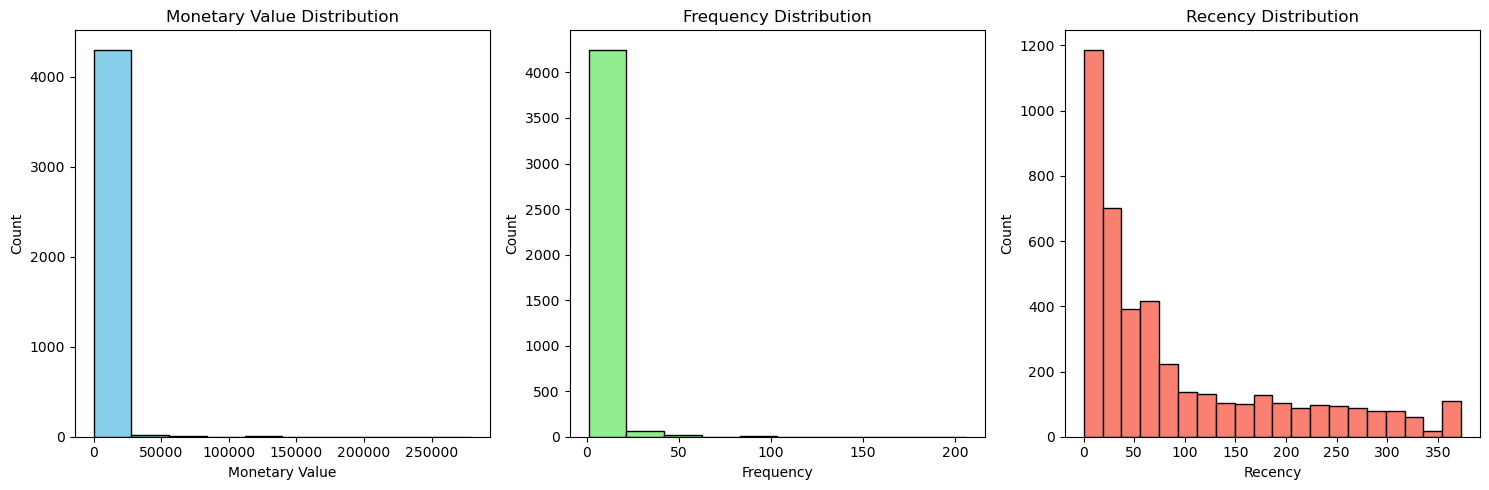

In [93]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df_2011['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df_2011['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df_2011['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

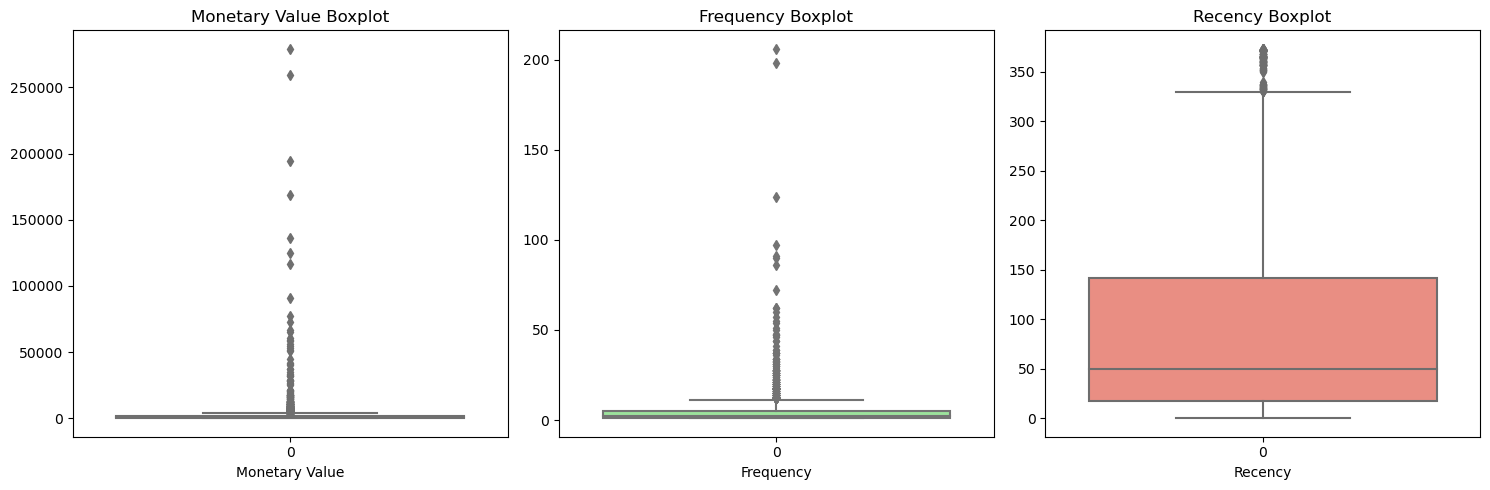

In [94]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df_2011['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df_2011['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df_2011['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [95]:
M_Q1 = aggregated_df_2011['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df_2011['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_2011 = aggregated_df_2011[(aggregated_df_2011['MonetaryValue'] < M_Q1 - 1.5 * M_IQR) | (aggregated_df_2011['MonetaryValue'] > M_Q3 + 1.5 * M_IQR)].copy()

monetary_outliers_2011.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,425.00,425.00,425.00,425.00
mean,15033.64,12568.00,16.65,24.72
std,1797.85,26097.90,19.07,47.08
min,12346.00,3622.68,1.00,0.00
25%,13324.00,4359.32,8.00,3.00
50%,15005.00,5891.61,12.00,10.00
75%,16655.00,9430.52,19.00,23.00
max,18251.00,279138.02,206.00,371.00


In [96]:
F_Q1 = aggregated_df_2011['Frequency'].quantile(0.25)
F_Q3 = aggregated_df_2011['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df_2011 = aggregated_df_2011[(aggregated_df_2011['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df_2011['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df_2011.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,278.00,278.00,278.00,278.00
mean,15355.67,14488.01,23.09,13.17
std,1745.00,30142.78,21.17,30.37
min,12395.00,1296.44,12.00,0.00
25%,13880.25,4197.77,13.00,2.00
50%,15290.50,6283.52,17.00,5.50
75%,16781.25,11040.84,25.00,15.00
max,18283.00,279138.02,206.00,371.00


In [97]:
non_outliers_df_2011 = aggregated_df_2011[(~aggregated_df_2011.index.isin(monetary_outliers_2011.index)) & (~aggregated_df_2011.index.isin(frequency_outliers_df_2011.index))]

non_outliers_df_2011.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,3863.00,3863.00,3863.00,3863.00
mean,15323.85,853.81,2.76,99.94
std,1709.73,794.61,2.17,101.87
min,12348.00,3.75,1.00,0.00
25%,13850.50,278.50,1.00,21.00
50%,15333.00,570.46,2.00,58.00
75%,16798.00,1187.01,4.00,160.00
max,18287.00,3619.17,11.00,373.00


KeyError: 0

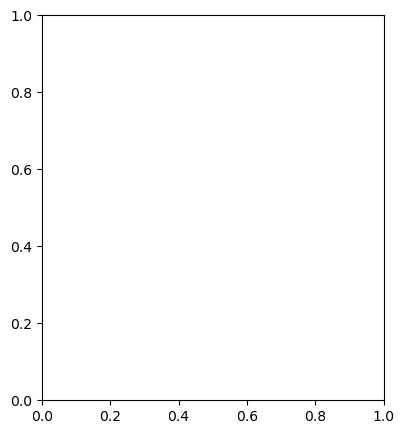

In [98]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df_2011['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df_2011['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df_2011['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

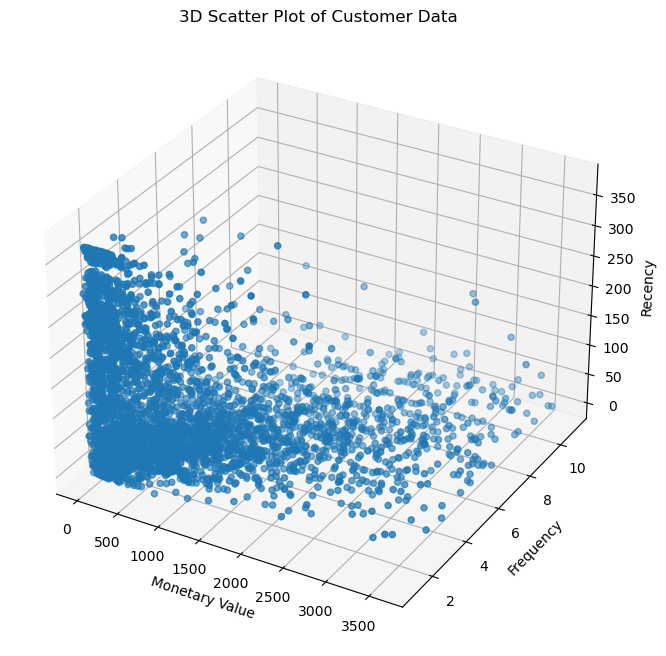

In [99]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df_2011["MonetaryValue"], non_outliers_df_2011["Frequency"], non_outliers_df_2011["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [100]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df_2011[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]])

In [101]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df_2011.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.73,0.57,-0.25
3,0.76,-0.81,-0.80
4,-0.70,-0.81,2.05
5,0.67,1.96,-0.64
6,-0.96,-0.81,1.01
...,...,...,...
4328,-0.86,-0.81,-0.26
4329,-0.85,-0.81,1.74
4330,-0.97,-0.81,0.79
4331,-0.85,-0.35,-0.91


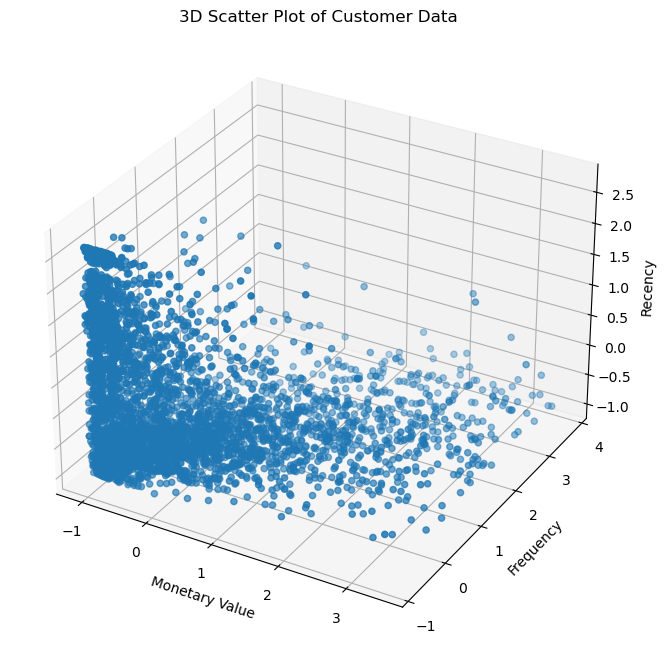

In [102]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

KMeans Clustering

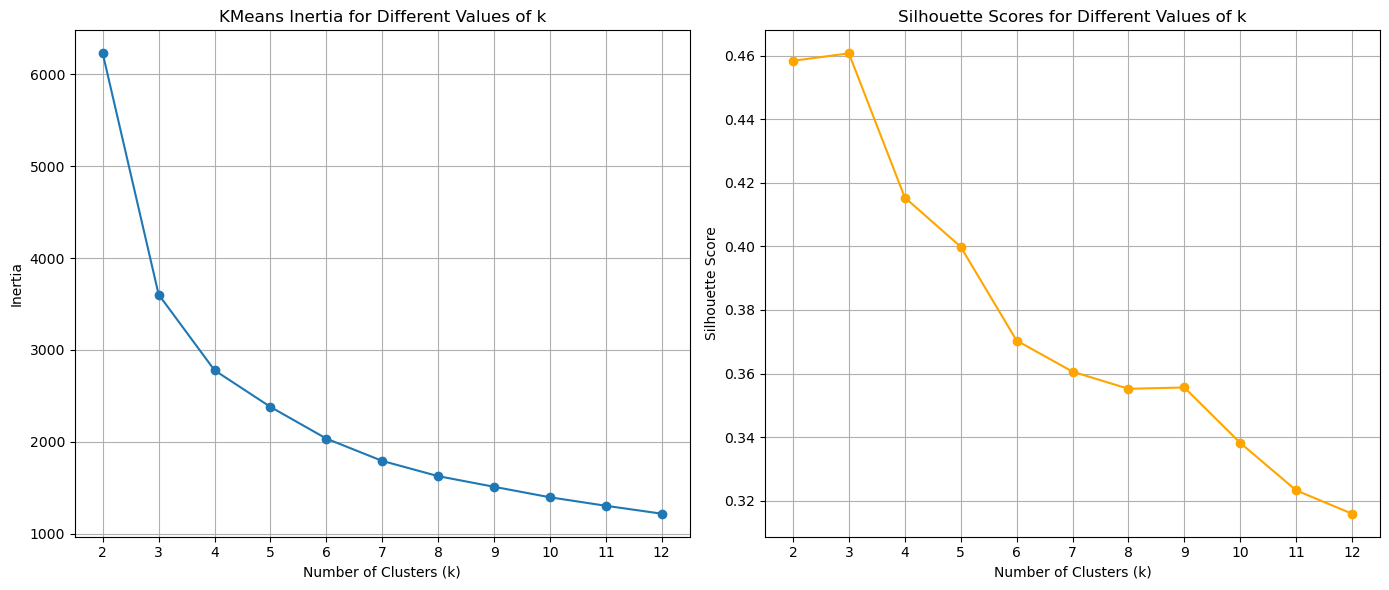

In [103]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [104]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 0, 2, ..., 2, 0, 3], dtype=int32)

In [105]:
non_outliers_df_2011["Cluster"] = cluster_labels

non_outliers_df_2011

/var/folders/ct/l1m17gxn7bx77_fchtrtdk580000gn/T/ipykernel_1312/2287511831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df_2011["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,2
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,1
6,12353.00,89.00,1,2011-05-19 17:47:00,203,2
...,...,...,...,...,...,...
4328,18278.00,173.90,1,2011-09-27 11:58:00,73,0
4329,18280.00,180.60,1,2011-03-07 09:52:00,277,2
4330,18281.00,80.82,1,2011-06-12 10:53:00,180,2
4331,18282.00,178.05,2,2011-12-02 11:43:00,7,0


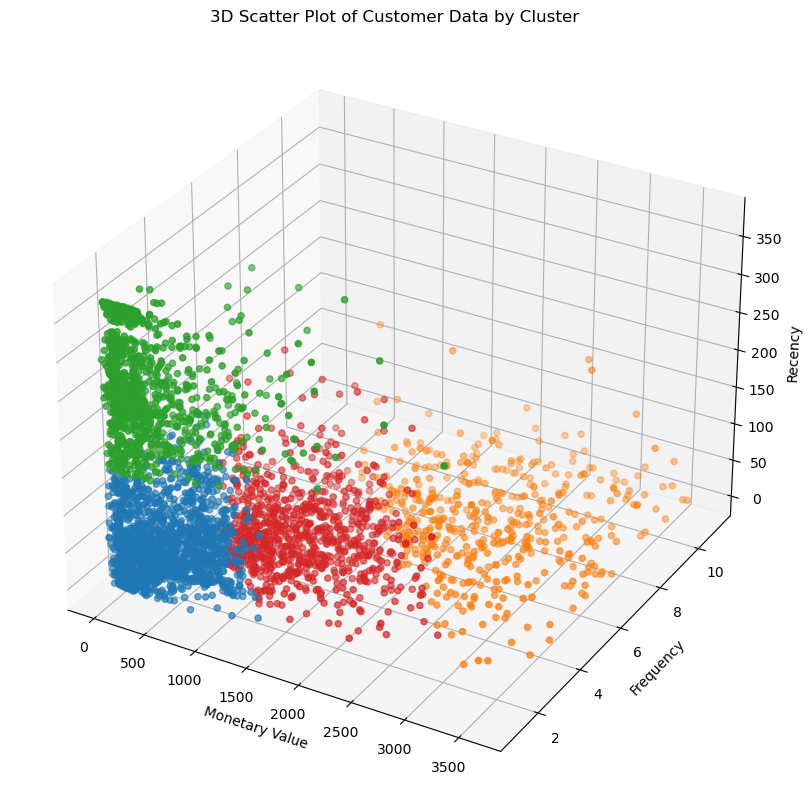

In [106]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df_2011['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df_2011['MonetaryValue'], 
                     non_outliers_df_2011['Frequency'], 
                     non_outliers_df_2011['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

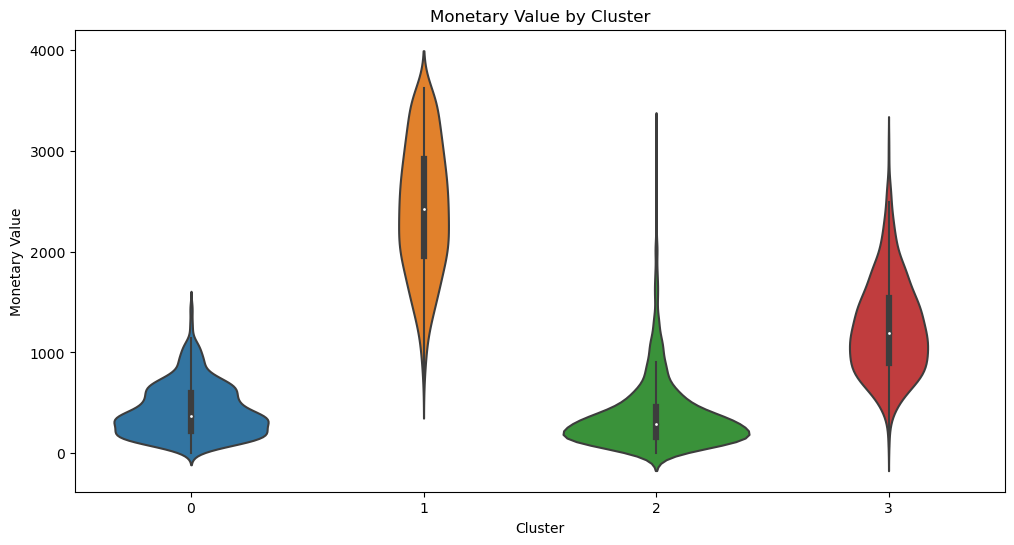

In [107]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2011['Cluster'], 
               y=non_outliers_df_2011['MonetaryValue'], 
               palette=cluster_colors)

# Titles and labels
plt.title('Monetary Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')

# Show plot
plt.show()

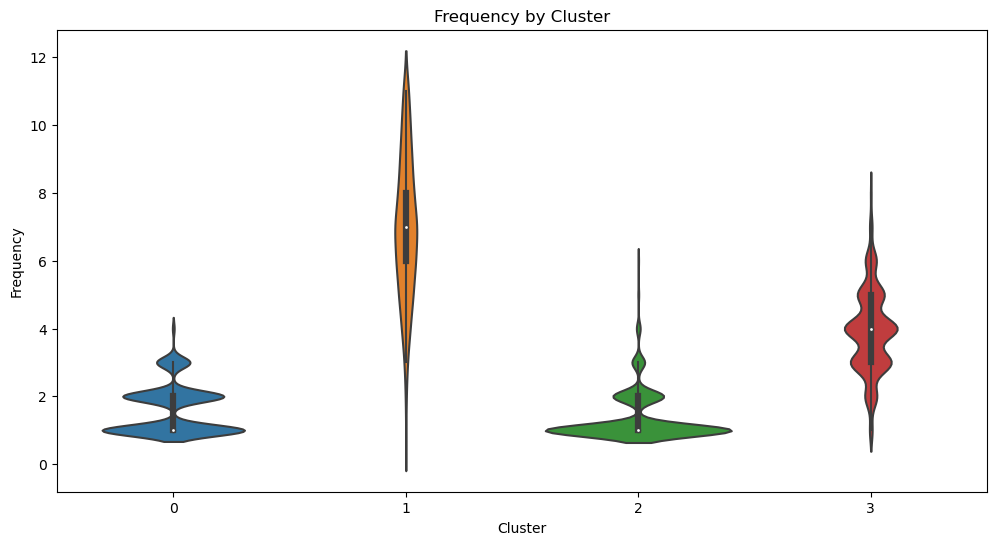

In [108]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2011['Cluster'], 
               y=non_outliers_df_2011['Frequency'], 
               palette=cluster_colors)

# Titles and labels
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Show plot
plt.show()

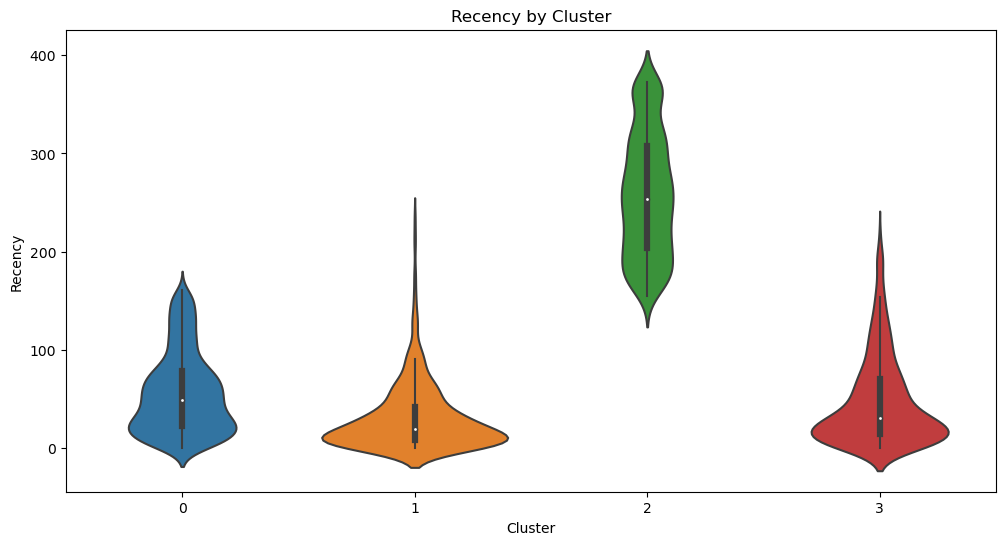

In [109]:
plt.figure(figsize=(12, 6))  # Set figure size

# Cluster-specific violin plot (colored by cluster)
sns.violinplot(x=non_outliers_df_2011['Cluster'], 
               y=non_outliers_df_2011['Recency'], 
               palette=cluster_colors)

# Titles and labels
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Show plot
plt.show()

In [110]:
overlap_indices = monetary_outliers_2011.index.intersection(frequency_outliers_df_2011.index)

monetary_only_outliers = monetary_outliers_2011.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df_2011.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_2011.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.00,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.00,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.00,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.00,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


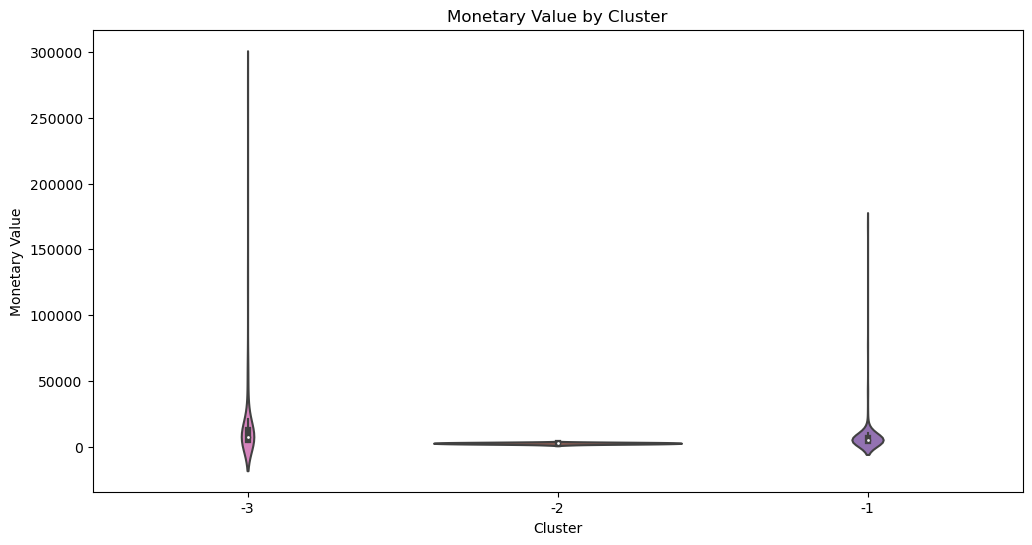

In [111]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors)
#sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.show()

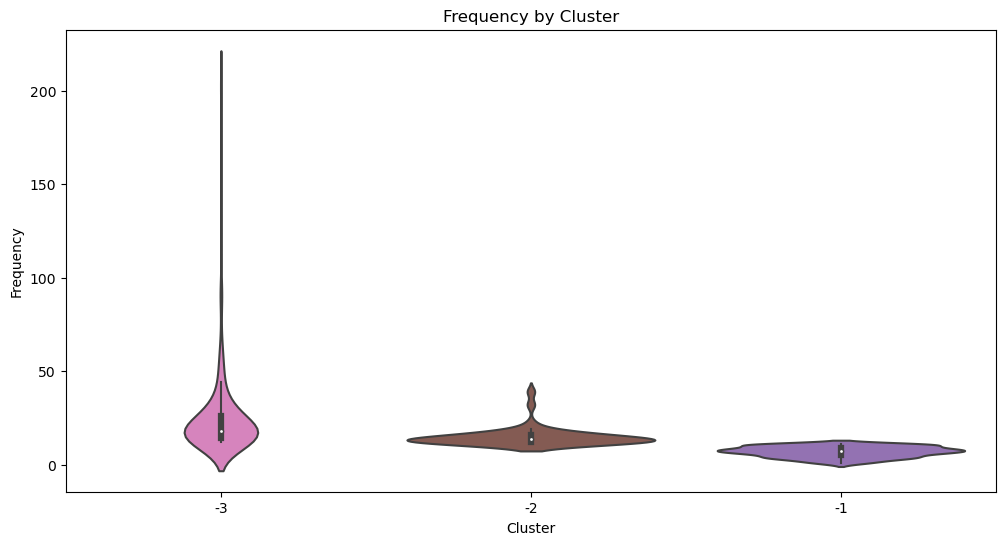

In [112]:
plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors)
#sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.show()

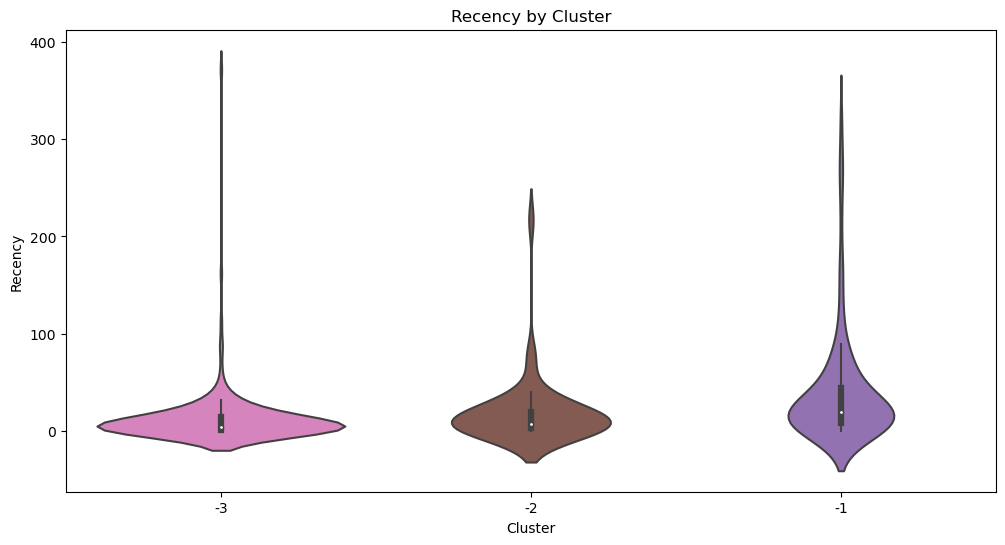

In [113]:
plt.figure(figsize=(12, 6))

sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors)
#sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.show()

In [114]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [115]:
full_clustering_df = pd.concat([non_outliers_df_2011, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,2
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,1
6,12353.00,89.00,1,2011-05-19 17:47:00,203,2
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


In [116]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3,REWARD
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0,RETAIN
4,12350.00,294.40,1,2011-02-02 16:01:00,309,2,NURTURE
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,1,RE-ENGAGE
6,12353.00,89.00,1,2011-05-19 17:47:00,203,2,NURTURE
...,...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


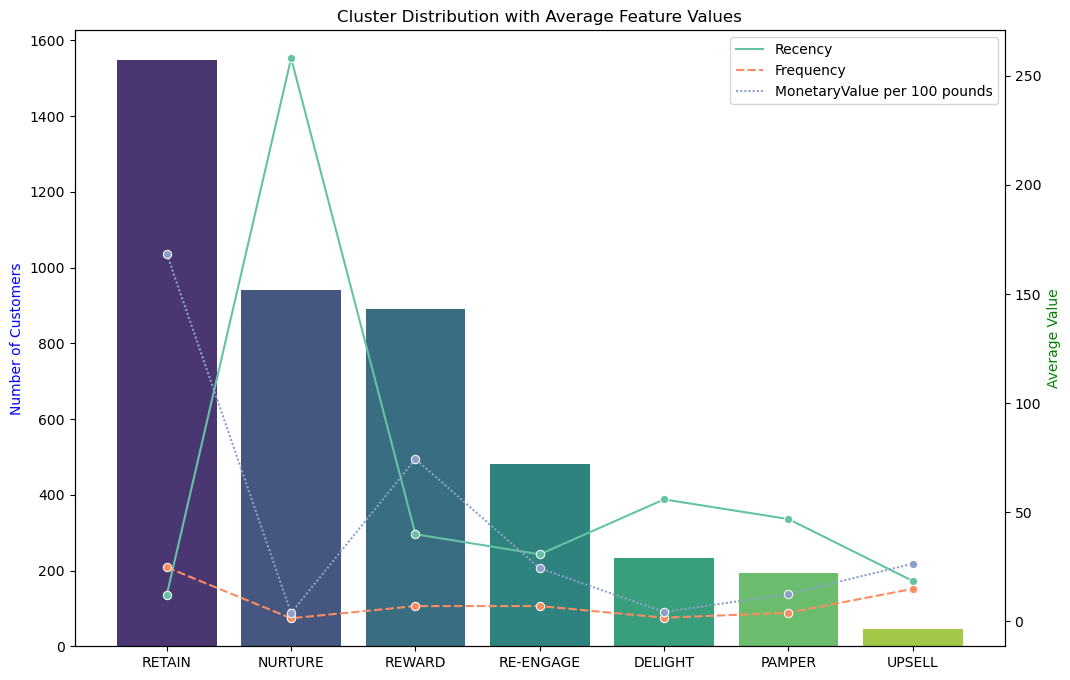

In [117]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis')
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()